In [2]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import random
from PIL import Image
import requests
from io import BytesIO
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings("ignore")

## Load Data

## Preprocessing Data

In [3]:
from pandas.core.computation.pytables import FilterBinOp
AAPL_new=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/New_Stock/AAPL.csv")
AAPL_new['Name']="Apple"
AMZN_new=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/New_Stock/AMZN.csv")
AMZN_new['Name']="Amazon"
FB_new=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/New_Stock/META.csv")
FB_new['Name']="Facebook"
GOOG_new=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/New_Stock/GOOG.csv")
# Class A stocks are common shares
GOOG_new['Name']="Google_classA"
GOOGL_new=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/New_Stock/GOOGL.csv")
#Class C shares give stockholders an ownership stake in the company
GOOGL_new['Name']="Google_classC"
NFLX_new=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/New_Stock/NFLX.csv")
NFLX_new['Name']="Netflix"

In [4]:
All_stocks_new=pd.concat([AAPL_new,AMZN_new,FB_new,GOOG_new,GOOGL_new,NFLX_new])
print(All_stocks_new.shape)
All_stocks_new['Close/Last']=All_stocks_new['Close/Last'].str[1:]
All_stocks_new['Open']=All_stocks_new['Open'].str[1:]
All_stocks_new['High']=All_stocks_new['High'].str[1:]
All_stocks_new['Low']=All_stocks_new['Low'].str[1:]
All_stocks_new["Close/Last"]=pd.to_numeric(All_stocks_new["Close/Last"])
All_stocks_new["Open"]=pd.to_numeric(All_stocks_new["Open"])
All_stocks_new["High"]=pd.to_numeric(All_stocks_new["High"])
All_stocks_new["Low"]=pd.to_numeric(All_stocks_new["Low"])
All_stocks_new['Date']= pd.to_datetime(All_stocks_new['Date'])
All_stocks_new.head()

(1506, 7)


,Date,Close/Last,Volume,Open,High,Low,Name
0,2023-03-24,160.25,59256340,158.86,160.3400,157.85,Apple
1,2023-03-23,158.93,67622060,158.83,161.5501,157.68,Apple
2,2023-03-22,157.83,75701810,159.30,162.1400,157.81,Apple
3,2023-03-21,159.28,73938290,157.32,159.4000,156.54,Apple
4,2023-03-20,157.40,73641420,155.07,157.8200,154.15,Apple


In [5]:
All_stocks_new.dtypes

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
Name                  object
dtype: object

In [9]:
# Removing data after date 2022-09-14
All_stocks_new.sort_values(by=['Date'])
All_stocks_new=All_stocks_new[All_stocks_new['Date']>'2022-09-14']

In [21]:
All_stocks_new=All_stocks_new.rename(columns={"Close/Last":"Close"}, errors="raise")
All_stocks_new

,Date,Close,Volume,Open,High,Low,Name
0,2023-03-24,160.25,59256340,158.86,160.3400,157.85,Apple
1,2023-03-23,158.93,67622060,158.83,161.5501,157.68,Apple
2,2023-03-22,157.83,75701810,159.30,162.1400,157.81,Apple
3,2023-03-21,159.28,73938290,157.32,159.4000,156.54,Apple
4,2023-03-20,157.40,73641420,155.07,157.8200,154.15,Apple
...,...,...,...,...,...,...,...
127,2022-09-21,236.87,9166772,242.67,248.2999,236.68,Netflix
128,2022-09-20,242.85,16037430,240.37,250.4900,239.66,Netflix
129,2022-09-19,243.63,17912370,245.05,245.2500,235.75,Netflix
130,2022-09-16,240.13,18914180,231.22,241.3550,227.83,Netflix


In [11]:
from pandas.core.computation.pytables import FilterBinOp
AAPL=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/AAPL Historical Data.csv")
AAPL['Name']="Apple"
AMZN=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/AMZN Historical Data.csv")
AMZN['Name']="Amazon"
FB=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/FB Historical Data.csv")
FB['Name']="Facebook"
GOOG=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/GOOG Historical Data.csv")
# Class A stocks are common shares
GOOG['Name']="Google_classA"
GOOGL=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/GOOGL Historical Data.csv")
#Class C shares give stockholders an ownership stake in the company
GOOGL['Name']="Google_classC"
NFLX=pd.read_csv("/content/drive/MyDrive/Capstone/dataset/NFLX Historical Data.csv")
NFLX['Name']="Netflix"

In [12]:
NFLX.shape

(5114, 7)

In [13]:
AMZN.shape

(6377, 7)

In [14]:
FB.shape

(2599, 7)

In [15]:
GOOG.shape

(2133, 7)

In [16]:
GOOGL.shape

(4550, 7)

In [17]:
AAPL.shape

(10529, 7)

In [18]:
All_stocks=pd.concat([AAPL,AMZN,FB,GOOG,GOOGL,NFLX])
All_stocks['Date']= pd.to_datetime(All_stocks['Date'])
print(All_stocks.shape)
All_stocks.head()

(31302, 7)


,Date,Open,High,Low,Close,Volume,Name
0,1980-12-12,0.13,0.13,0.13,0.13,469034080,Apple
1,1980-12-15,0.12,0.12,0.12,0.12,175884976,Apple
2,1980-12-16,0.11,0.11,0.11,0.11,105728104,Apple
3,1980-12-17,0.12,0.12,0.12,0.12,86441688,Apple
4,1980-12-18,0.12,0.12,0.12,0.12,73449672,Apple


In [19]:
All_stocks.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
dtype: object

In [25]:
All=pd.concat([All_stocks_new,All_stocks])
All.sort_values(by=['Date']);
All

,Date,Close,Volume,Open,High,Low,Name
0,2023-03-24,160.25,59256340,158.86,160.3400,157.85,Apple
1,2023-03-23,158.93,67622060,158.83,161.5501,157.68,Apple
2,2023-03-22,157.83,75701810,159.30,162.1400,157.81,Apple
3,2023-03-21,159.28,73938290,157.32,159.4000,156.54,Apple
4,2023-03-20,157.40,73641420,155.07,157.8200,154.15,Apple
...,...,...,...,...,...,...,...
5109,2022-09-08,227.44,6693979,223.80,228.6900,221.33,Netflix
5110,2022-09-09,233.57,6646273,230.61,234.7100,230.40,Netflix
5111,2022-09-12,236.53,6014669,234.00,239.4900,233.62,Netflix
5112,2022-09-13,218.13,7852039,226.29,227.5100,217.74,Netflix


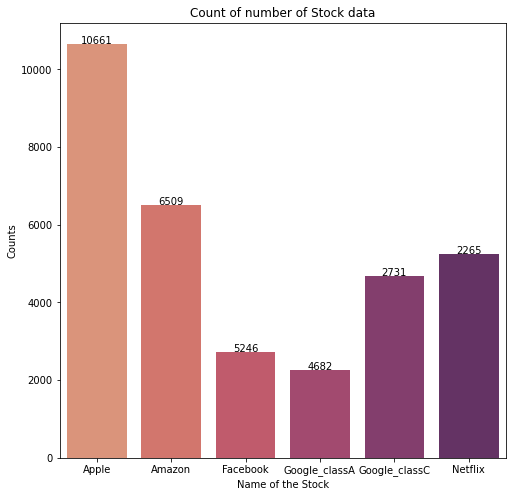

In [26]:
##Visulaizing the count of Daily Stock data.
labels=All['Name'].value_counts().index
values=All['Name'].value_counts().values
fig, ax = plt.subplots(figsize =(8,8))
a = sns.countplot(data=All, x='Name', palette='flare')
a.set(xlabel='Name of the Stock', ylabel='Counts', title='Count of number of Stock data');
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center");

In [37]:
Apple=All[All['Name']=="Apple"]
Amazon=All[All['Name']=="Amazon"]
Facebook=All[All['Name']=="Facebook"]
Google_classA=All[All['Name']=="Google_classA"]
Google_classC=All[All['Name']=="Google_classC"]
Netflix=All[All['Name']=="Netflix"]

<Axes: xlabel='Date'>

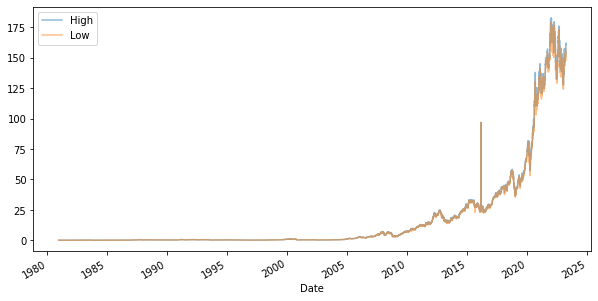

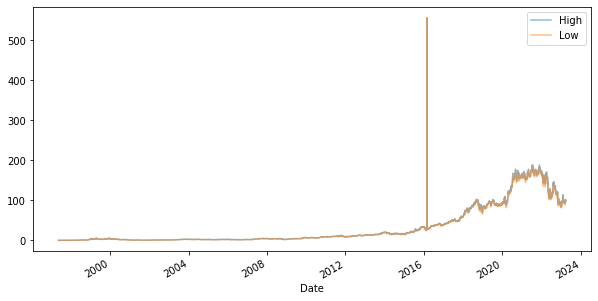

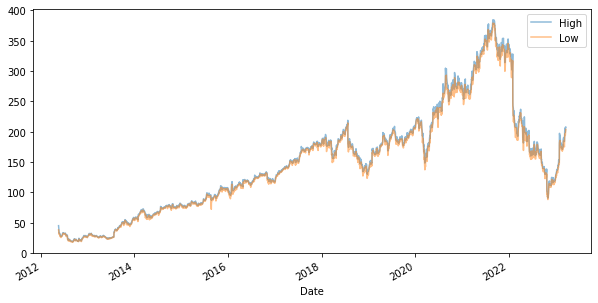

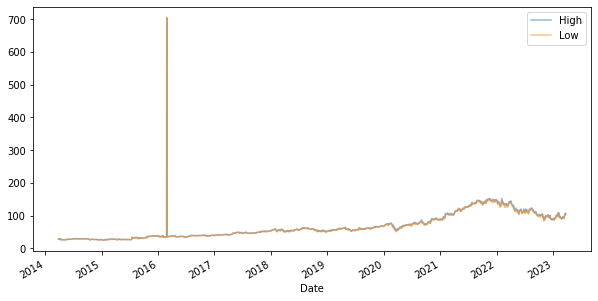

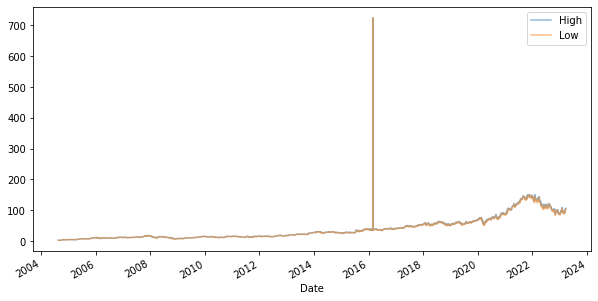

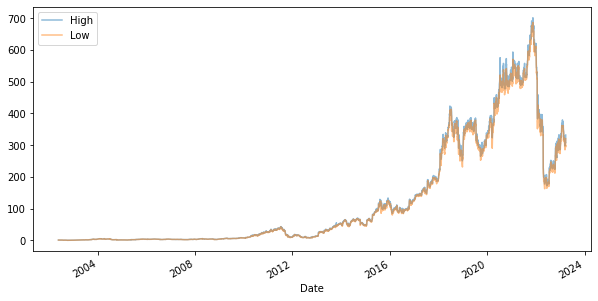

In [38]:
Apple=Apple.set_index('Date')
Amazon=Amazon.set_index('Date')
Facebook=Facebook.set_index('Date')
Google_classA=Google_classA.set_index('Date')
Google_classC=Google_classC.set_index('Date')
Netflix=Netflix.set_index('Date')

Apple[['High', 'Low']].plot(figsize = (10, 5), alpha = 0.5, use_index="Date")
Amazon[['High', 'Low']].plot(figsize = (10, 5), alpha = 0.5, use_index="Date")
Facebook[['High', 'Low']].plot(figsize = (10, 5), alpha = 0.5, use_index="Date")
Google_classA[['High', 'Low']].plot(figsize = (10, 5), alpha = 0.5, use_index="Date")
Google_classC[['High', 'Low']].plot(figsize = (10, 5), alpha = 0.5, use_index="Date")
Netflix[['High', 'Low']].plot(figsize = (10, 5), alpha = 0.5, use_index="Date")

In [39]:
All.head(1)

,Date,Close,Volume,Open,High,Low,Name
0,2023-03-24,160.25,59256340,158.86,160.34,157.85,Apple


<Axes: xlabel='Date', ylabel='Volume'>

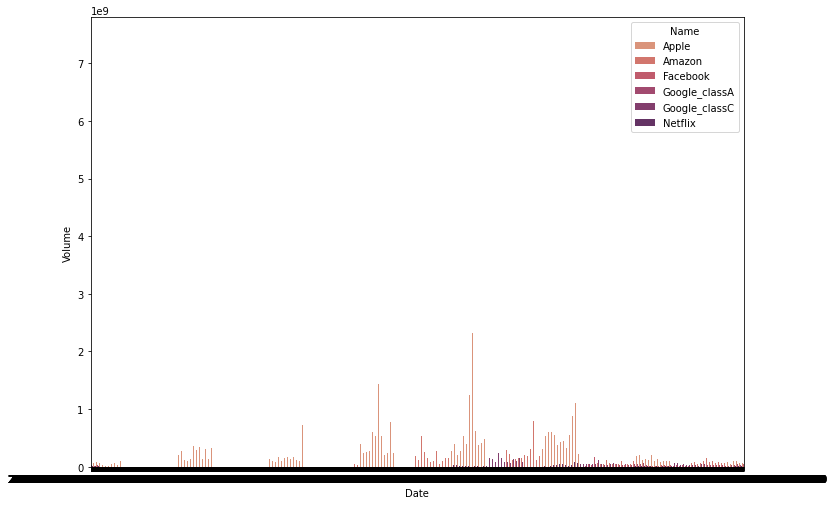

In [43]:
import seaborn as sns
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(data=All, x="Date", y="Volume", hue="Name",palette="flare")